In [ ]:
#Reminders
add data to gitignore file

## Set up steps

#### Import relevant Python libraries

In [1]:
#import libaries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

#### Import heart data into a dataframe

In [2]:
heart_data = pd.read_csv("data/heart.csv")

## Examine the Data

#### Preview the data and get basic information

**[Some background facts about heart disease:](https://towardsdatascience.com/heart-disease-prediction-73468d630cfc)**

It is difficult to identify heart disease because of several contributory risk factors.

Those factors include diabetes, high blood pressure, high cholesterol, abnormal pulse rate, and many other factors.

In [3]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart_data.info()
#this dataset has 33 rows and 14 columns, most values are integer data types and the remaining is float values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


#### Search for missing values

In [5]:
missing_values_count = heart_data.isnull().sum()
missing_values_count
#There are no missing values in any of the columns

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### Search for inconsistency in the way the data is entered and view the distribution ####

Key questions:

1. Is the data within each column entered consistently?  
2. How is the data in each column distributed? (plot the data)

For each variable, the following steps are taken:
1. list relevant interesting facts, often with a link to more information
2. list the range of values using the .unique() method
3. plot the distribution of values with a Seaborn histogram
4. if needed, sort the values to identify the high/low values using the .sort_values() method
5. if needed, assign the values to a meaningful category (ex: healthy vs. high blood pressure) using the binning method
6. if needed, calculate the percentage of values in each category and plot the percents using a Matplot Lib pie chart

<u>**Age**</u>

**Some interesting facts about the age variable:**

Age is the most important risk factor in developing cardiovascular or heart diseases.

Coronary fatty streaks can begin to form in adolescence and heart disease risk triples with each decade of life. 

It is estimated that 82 percent of people who die of coronary heart disease are 65 and older. 

Simultaneously, the risk of stroke doubles every decade after age 55.

In [11]:
#identify what ages are in the dataset
age = heart_data['age'].unique()
age

array([63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 58, 50, 66, 43, 69, 59,
       42, 61, 40, 71, 51, 65, 53, 46, 45, 39, 47, 62, 34, 35, 29, 55, 60,
       67, 68, 74, 76, 70, 38, 77], dtype=int64)

<AxesSubplot:xlabel='age', ylabel='Count'>

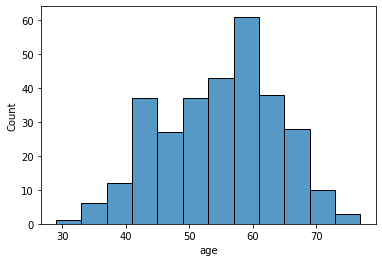

In [7]:
#plot the distribution
sns.histplot(data=heart_data, x="age")

In [12]:
#sort the data to identify the min and max age
heart_data["age"].sort_values()

72     29
58     34
125    34
239    35
65     35
       ..
60     71
151    71
129    74
144    76
238    77
Name: age, Length: 303, dtype: int64

**Question: What percentage of each age group are there in the dataset?**

In [13]:
# Bin the Age column
age_bins = [20, 30, 40, 50, 60, 70, 80]
age_labels = ["20s", "30s", "40s", "50s", "60s", "70s"]

# cut() returns a Pandas Series containing each of the binned column's values translated into their corresponding bins
#this series is appended onto the dataframe
heart_data["age_group"] = pd.cut(heart_data["age"], age_bins, labels=age_labels)

#count the number of patients in each age group
print(heart_data.value_counts('age_group'))

#calculate the percentage of patients in each age group
age_percents = (heart_data.value_counts('age_group') / heart_data['age'].count()) * 100
age_percents


age_group
50s    129
40s     76
60s     73
30s     18
70s      6
20s      1
dtype: int64


age_group
50s    42.574257
40s    25.082508
60s    24.092409
30s     5.940594
70s     1.980198
20s     0.330033
dtype: float64

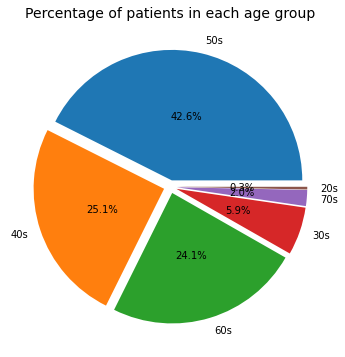

In [31]:
#plot the age percentages using matplotlib (pie charts aren't available in Seaborn)
pie, ax = plt.subplots(figsize=[10,6])
labels = age_percents.keys()
plt.pie(x=age_percents, autopct="%.1f%%", explode=[0.05]*6, labels=labels, pctdistance=0.5)
plt.title("Percentage of patients in each age group", fontsize=14);
pie.savefig("AgePercents.png")

<u>**Gender**</u> 

**Some interesting facts about the gender variable:**

Men are at greater risk of heart disease than pre-menopausal women. 

Once past menopause, it has been argued that a woman’s risk is similar to a man’s although more recent data from the WHO and UN disputes this. 

If a woman has diabetes, she is more likely to develop heart disease than a man with diabetes.

In [14]:
#examine how gender is noted in the dataset
gender = heart_data['sex'].unique()
gender
#dataset documentation explains that: 1 = male, 0 = female

array([1, 0], dtype=int64)

<AxesSubplot:xlabel='sex', ylabel='Count'>

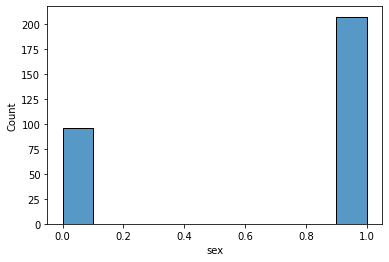

In [15]:
#plot the distribution
sns.histplot(data=heart_data, x="sex")
#there are twice as many men in this dataset than women

<u>**Chest Pain**</u> 

In the dataset, chest pain type displays the type of chest-pain experienced by the individual using the following format:

1. typical angina
2. atypical angina
3. non-anginal pain
4. asymptotic

In [24]:
#examine how chest pain is noted in the dataset
chest_pain_type = heart_data['cp'].value_counts()
chest_pain_type

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

These values aren't making since because the documentation lists 1 - 4.

In [27]:
#sort the data to examine it further
heart_data["cp"].sort_values()

151    0
96     0
97     0
211    0
209    0
      ..
117    3
101    3
259    3
286    3
0      3
Name: cp, Length: 303, dtype: int64

Internet research and reviewing [other developer's analysis](https://coderkian.com/week-3-exploratory-data-analysis-on-heart-disease-dataset-kaggle/) of this dataset reveals that a "0" value is interpreted as no chest pain.

Therefore, this dataset is showing 143 patients with no chest pain and no patients who have the 4 -'asymptomatic' value.

<AxesSubplot:xlabel='cp', ylabel='Count'>

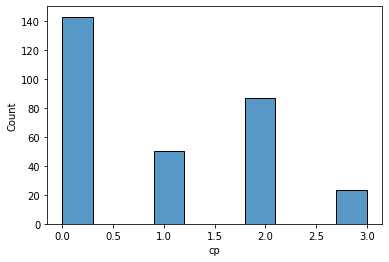

In [17]:
#plot the distribution
sns.histplot(data=heart_data, x="cp")

**Question: What percentage of each chest pain type group are there in the dataset?**

In [28]:
# Bin the Chest Pain Type column
cp_bins = [-1, 0, 1, 2, 3, 4]
cp_labels = ["no pain", "typical angina", "atypical angina", "non-anginal pain", "asymptotic"]

# cut() returns a Pandas Series containing each of the binned column's values translated into their corresponding bins
#this series is appended onto the dataframe
heart_data["chest_pain_type"] = pd.cut(heart_data["cp"], cp_bins, labels=cp_labels)

#count the number of patients in each group
print(heart_data.value_counts('chest_pain_type'))

#calculate the percentage of patients in each group
cp_percents = (heart_data.value_counts('chest_pain_type') / heart_data['cp'].count()) * 100
cp_percents

chest_pain_type
no pain             143
atypical angina      87
typical angina       50
non-anginal pain     23
asymptotic            0
dtype: int64


chest_pain_type
no pain             47.194719
atypical angina     28.712871
typical angina      16.501650
non-anginal pain     7.590759
asymptotic           0.000000
dtype: float64

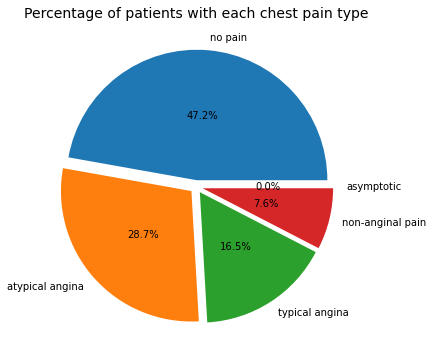

In [32]:
#plot the chest pain type percentages 
pie, ax = plt.subplots(figsize=[10,6])
labels = cp_percents.keys()
plt.pie(x=cp_percents, autopct="%.1f%%", explode=[0.05]*5, labels=labels, pctdistance=0.5)
plt.title("Percentage of patients with each chest pain type", fontsize=14);
pie.savefig("ChestPainType.png")

<u>**Resting Blood Pressure**</u> 

Resting Blood Pressure displays the resting blood pressure value of an individual in mmHg (unit) on admission to the hospital.

**[Some interesting facts about blood pressure readings](https://www.mayoclinic.org/diseases-conditions/high-blood-pressure/in-depth/blood-pressure/art-20050982)**

Your total blood pressure reading is determined by measuring your systolic and diastolic blood pressures. 

Systolic blood pressure, the top number, measures the force your heart exerts on the walls of your arteries each time it beats. 

Diastolic blood pressure, the bottom number, measures the force your heart exerts on the walls of your arteries in between beats.

Blood pressure readings fall into four general categories, ranging from normal to stage 2 high blood pressure (hypertension).

| Top number (systolic) in mm HG   | And/or | Bottom number (diastolic) in mm Hg | Category |
| --- | --- | --- | --- |              
| Below 120     | and     | Below 80      | Normal blood pressure                       |
| 120-129       | and     | Below 80      | Elevated blood pressure                     |
| 130-139       | or      | 80-89         | Stage 1 high blood pressure (hypertension)  |
| 140 or higher | or      | 90 or higher  | Stage 2 high blood pressure (hypertension)  |

If you are an adult with a 10 percent or higher risk of developing cardiovascular disease in the next 10 years, or if you have chronic kidney disease, diabetes or coronary artery disease, your treatment goal is less than 130/80 mm Hg. 

If you're a healthy adult age 65 or older, your treatment goal is also less than 130/80 mm Hg.

In [17]:
resting_blood_pressure = heart_data['trestbps'].unique()
resting_blood_pressure

array([145, 130, 120, 140, 172, 150, 110, 135, 160, 105, 125, 142, 155,
       104, 138, 128, 108, 134, 122, 115, 118, 100, 124,  94, 112, 102,
       152, 101, 132, 148, 178, 129, 180, 136, 126, 106, 156, 170, 146,
       117, 200, 165, 174, 192, 144, 123, 154, 114, 164], dtype=int64)

*These must be systolic (top number) blood pressure values.*

<AxesSubplot:xlabel='trestbps', ylabel='Count'>

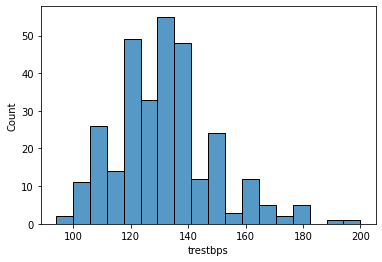

In [33]:
#plot the distribution
sns.histplot(data=heart_data, x="trestbps")

**Question: What percentage of each resting blood pressure category are there in the dataset?**

In [46]:
# Bin the resting blood pressure column
rbp_bins = [0, 119, 129, 139, 300]
rbp_labels = ["normal", "elevated", "stage 1 high", "stage 2 high"]

# cut() returns a Pandas Series containing each of the binned column's values translated into their corresponding bins
#this series is appended onto the dataframe
heart_data["rbp_category"] = pd.cut(heart_data["trestbps"], rbp_bins, labels=rbp_labels)

#count the number of patients in each group
print(heart_data.value_counts('rbp_category'))

#calculate the percentage of patients in each group
rbp_percents = (heart_data.value_counts('rbp_category') / heart_data['trestbps'].count()) * 100
rbp_percents

rbp_category
stage 2 high    97
elevated        75
stage 1 high    71
normal          60
dtype: int64


rbp_category
stage 2 high    32.013201
elevated        24.752475
stage 1 high    23.432343
normal          19.801980
dtype: float64

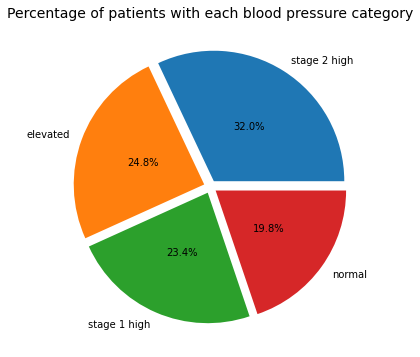

In [35]:
#plot the blood pressure category percentages 
pie, ax = plt.subplots(figsize=[10,6])
labels = rbp_percents.keys()
plt.pie(x=rbp_percents, autopct="%.1f%%", explode=[0.05]*4, labels=labels, pctdistance=0.5)
plt.title("Percentage of patients with each blood pressure category", fontsize=14);
pie.savefig("BloodPressureCategory.png")

<u>**Cholestoral**</u>

Serum Cholestrol displays the serum cholesterol in mg/dl (unit)

**[Some interesting facts about cholestrol](https://www.healthline.com/health/serum-cholesterol#results)**

Cholesterol is often associated with heart disease because can build up in your arteries and restrict or block blood flow.

Measuring your LDL (“bad” cholesterol), HDL (“good” cholesterol), and triglycerides will give you a number called your total blood cholesterol, or serum cholesterol. 

Your serum cholesterol levels can help your doctor figure out your risk for developing heart disease in the next 10 years.

Lab reports will show serum cholesterol levels in milligrams per deciliter (mg/dL).

| [category](https://www.mayoclinic.org/diseases-conditions/high-blood-cholesterol/diagnosis-treatment/drc-20350806) | serum cholestrol level |
| --- | --- | 
| Healthy | less than 200 mg/dL |
| Borderline high | 200-239 mg/dL |
| High | 240 mg/dL and above |

In [40]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group,chest_pain_type,rbp_category
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,60s,non-anginal pain,stage 2 high
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,30s,atypical angina,stage 1 high
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,40s,typical angina,stage 1 high
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,50s,typical angina,elevated
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,50s,no pain,elevated


In [37]:
cholesterol = heart_data['chol'].unique()
cholesterol

array([233, 250, 204, 236, 354, 192, 294, 263, 199, 168, 239, 275, 266,
       211, 283, 219, 340, 226, 247, 234, 243, 302, 212, 175, 417, 197,
       198, 177, 273, 213, 304, 232, 269, 360, 308, 245, 208, 264, 321,
       325, 235, 257, 216, 256, 231, 141, 252, 201, 222, 260, 182, 303,
       265, 309, 186, 203, 183, 220, 209, 258, 227, 261, 221, 205, 240,
       318, 298, 564, 277, 214, 248, 255, 207, 223, 288, 160, 394, 315,
       246, 244, 270, 195, 196, 254, 126, 313, 262, 215, 193, 271, 268,
       267, 210, 295, 306, 178, 242, 180, 228, 149, 278, 253, 342, 157,
       286, 229, 284, 224, 206, 167, 230, 335, 276, 353, 225, 330, 290,
       172, 305, 188, 282, 185, 326, 274, 164, 307, 249, 341, 407, 217,
       174, 281, 289, 322, 299, 300, 293, 184, 409, 259, 200, 327, 237,
       218, 319, 166, 311, 169, 187, 176, 241, 131], dtype=int64)

<AxesSubplot:xlabel='chol', ylabel='Count'>

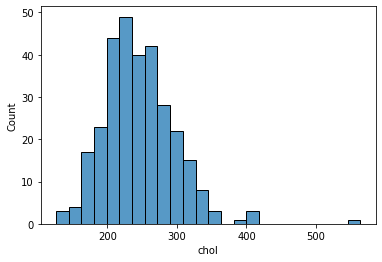

In [38]:
#plot the distribution
sns.histplot(data=heart_data, x="chol")

**Question: What percentage of each cholestrol category are there in the dataset?**

In [42]:
#sort the data to get the range
heart_data["chol"].sort_values()

111    126
301    131
53     141
151    149
267    149
      ... 
96     394
220    407
246    409
28     417
85     564
Name: chol, Length: 303, dtype: int64

In [44]:
# Bin the cholestrol column
chol_bins = [0, 199, 239, 600]
chol_labels = ["healthy", "borderline high", "high"]

# cut() returns a Pandas Series containing each of the binned column's values translated into their corresponding bins
#this series is appended onto the dataframe
heart_data["chol_level"] = pd.cut(heart_data["chol"], chol_bins, labels=chol_labels)

#count the number of patients in each group
print(heart_data.value_counts('chol_level'))

#calculate the percentage of patients in each group
chol_percents = (heart_data.value_counts('chol_level') / heart_data['chol'].count()) * 100
chol_percents

chol_level
high               155
borderline high     98
healthy             50
dtype: int64


chol_level
high               51.155116
borderline high    32.343234
healthy            16.501650
dtype: float64

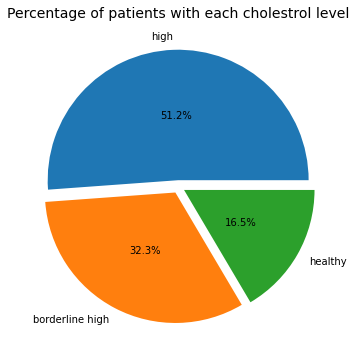

In [45]:
#plot the cholesterol category percentages 
pie, ax = plt.subplots(figsize=[10,6])
labels = chol_percents.keys()
plt.pie(x=chol_percents, autopct="%.1f%%", explode=[0.05]*3, labels=labels, pctdistance=0.5)
plt.title("Percentage of patients with each cholestrol level", fontsize=14);
pie.savefig("CholestrolLevel.png")

<u>**Fasting Blood Sugar**</u>

Fasting Blood Sugar compares the fasting blood sugar value of an individual with 120mg/dl.

1 (true) - fasting blood sugar is greater than 120mg/dl

0 (false) - fasting blood sugar is less than 120mg/dl

**some interesting facts about fasting blood sugar**

A normal fasting blood sugar level is 100 or less. 

Prediabetes is a fasting blood sugar of 101 to 125. 

A fasting blood sugar of 126 or greater indicates diabetes.

In [48]:
blood_sugar = heart_data['fbs'].value_counts()
blood_sugar

0    258
1     45
Name: fbs, dtype: int64

<AxesSubplot:xlabel='fbs', ylabel='Count'>

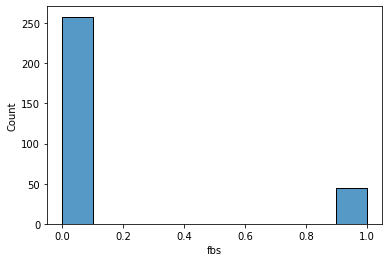

In [49]:
#plot the distribution
sns.histplot(data=heart_data, x="fbs")

<u>**Resting ECG**</u>

Resting ECG displays resting electrocardiographic results

0 = normal

1 = having ST-T wave abnormality

2 = left ventricular hyperthrophy

**some interesting facts about ECG results**

An electrocardiogram records the electrical signals in your heart. 

It's a common and painless test used to quickly detect heart problems and monitor your heart's health.

[ST-T wave abnormalities](https://www.medhelp.org/posts/Heart-Disease/ST--T-wave-abnormality--consider-anterior-ischemia/show/788679#:~:text=ST%20%26%20T%20wave%20abnormality%2C%20consider%20anterior%20ischemia.,aren%27t%20having%20any%20chest%20pain%20or%20any%20shortness) are nonspecific findings found on an EKG which may represent areas of low blood flow to the heart.

[Left ventricular hperthrophy](https://www.reference.com/world-view/causes-non-specific-st-t-wave-abnormalities-89255a4c3e7e27e8) is normally caused by high blood pressure and also the enlargement of the ventricle.

In [57]:
ecg = heart_data['restecg'].value_counts()
ecg

1    152
0    147
2      4
Name: restecg, dtype: int64

<AxesSubplot:xlabel='restecg', ylabel='Count'>

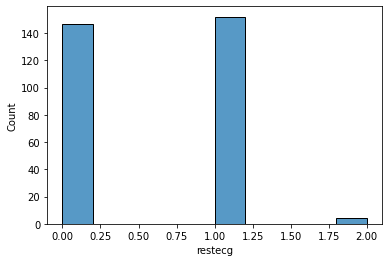

In [58]:
#plot the distribution
sns.histplot(data=heart_data, x="restecg")

In [60]:
#calculate the percentage of patients in each group
ecg_percents = (heart_data.value_counts('restecg') / heart_data['restecg'].count()) * 100
ecg_percents

restecg
1    50.165017
0    48.514851
2     1.320132
dtype: float64

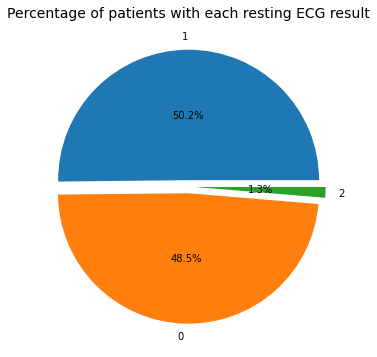

In [61]:
#plot the cholesterol category percentages 
pie, ax = plt.subplots(figsize=[10,6])
labels = ecg_percents.keys()
plt.pie(x=ecg_percents, autopct="%.1f%%", explode=[0.05]*3, labels=labels, pctdistance=0.5)
plt.title("Percentage of patients with each resting ECG result", fontsize=14);
pie.savefig("RestingECG.png")

<u> **Maximum Heart Rate Achieved** </u>

Max heart rate achieved displays the max heart rate achieved by an individual.

**some interesting facts about maximum heart rate achieved**

[The maximum heart rate is, on average, the highest your pulse can get.](https://www.webmd.com/heart-disease/heart-failure/qa/what-is-your-maximum-heart-rate) 

To calculate your predicted maximum heart rate, use this formula:

220 - Your Age = Predicted Maximum Heart Rate.

For example, a 40-year-old's predicted maximum heart rate is about 180 beats per minute.

[The increase in cardiovascular risk](https://towardsdatascience.com/heart-disease-prediction-73468d630cfc), associated with the acceleration of heart rate, is comparable to the increase in risk observed with high blood pressure. 

It has been shown that an increase in heart rate by 10 beats per minute is associated with an increase in the risk of cardiac death by at least 20%, and this increase in the risk is similar to the one observed with an increase in systolic blood pressure by 10 mm Hg.

In [63]:
max_heart_rate = heart_data['thalach'].unique()
max_heart_rate

array([150, 187, 172, 178, 163, 148, 153, 173, 162, 174, 160, 139, 171,
       144, 158, 114, 151, 161, 179, 137, 157, 123, 152, 168, 140, 188,
       125, 170, 165, 142, 180, 143, 182, 156, 115, 149, 146, 175, 186,
       185, 159, 130, 190, 132, 147, 154, 202, 166, 164, 184, 122, 169,
       138, 111, 145, 194, 131, 133, 155, 167, 192, 121,  96, 126, 105,
       181, 116, 108, 129, 120, 112, 128, 109, 113,  99, 177, 141, 136,
        97, 127, 103, 124,  88, 195, 106,  95, 117,  71, 118, 134,  90],
      dtype=int64)

For this variable, maximum heart rate is compared with age in order to assign a level to it

In [83]:
heart_data["age"].head()

0    63
1    37
2    41
3    56
4    57
Name: age, dtype: int64

In [81]:
subtract = 200 - heart_data["age"]
subtract.head()

0    137
1    163
2    159
3    144
4    143
Name: age, dtype: int64

In [89]:
heart_data.head()
max_category = heart_data[['age', 'thalach']]

#I want a for loop to iterate over the data and:
 #   1. calculate 200 - age
  #  2. if that max heart rate is more than that number
   # 3. append 'high' for that patient
    #4. if the max heart rate is less than or equal to that number
    #5. append 'target' for that patient

normal_max_rate = []

for value in heart_data["age"]:
    normal_max_rate.append(200 - value)

heart_data['normal_max_rate'] = normal_max_rate

max_rate_category = []

for value in heart_data["thalach"]:
    if value > heart_data["normal_max_rate"]:
        max_rate_category.append("high")
    else:
        max_rate_category.append("target")

heart_data.head()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

Key questions to answer
1. How many data points do I have? Enough for ML? Enough of the classes I’m trying to predict?
2. What are the columns? Column ranges?
3 What will my normalization strategy be? Do I have outliers? Are things in ranges that I expect?
4. What are the datatypes, and will they behave like I expect?
5. Are any numbers stored as strings? Will I have to clean them to get them to be numbers?
6. Do I have any missing values?  Any duplications? How many? Why?
7. Are features correlated?
8. In expected, gut-check ways, in novel ways, but also in data leakage ways: Do I have any weird distributions?
   (Huge skews, bimodal, uniform…)

In [ ]:
#Do any of the columns include similar data - but scaled quite differently? (ex: ft vs. mile for length)